# Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
import datetime

In [2]:
#!pip install tweepy

In [3]:
#!pip install tweepy

In [4]:
#!pip3 install tweepy

In [5]:
#!pip uninstall tweepy

In [6]:
#conda install -c conda-forge tweepy

# Read in the csv data 

In [7]:
enhanced_data = pd.read_csv('twitter-archive-enhanced (1).csv')
enhanced_data.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
471,816697700272001025,NaN,NaN,2017-01-04 17:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816697700...,12,10,Binky,None,None,None,None
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
2071,671115716440031232,NaN,NaN,2015-11-29 23:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671115716...,6,10,Phred,None,None,None,None
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
1519,690735892932222976,NaN,NaN,2016-01-23 03:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,None,None,None,None
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None
594,798705661114773508,NaN,NaN,2016-11-16 01:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Baloo. He's expecting a fa...,7.406770e+17,4.196984e+09,2016-06-08 22:48:46 +0000,https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None
258,843604394117681152,NaN,NaN,2017-03-19 23:25:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,None,None,None,None


In [8]:
enhanced_data_copy = enhanced_data.copy()

In [9]:
enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
enhanced_data_copy['tweet_id'].duplicated().sum()

0

In [11]:
enhanced_data_copy['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
enhanced_data.duplicated().sum()

0

In [13]:
#create a copy of my enhanced_data

enhanced_data_copy = enhanced_data.copy()

In [14]:
#Checking and reviewing enhanced_data columns with numbers to check for outliers
enhanced_data_copy.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


From the above, we can clearly see that there are outliers and we need to deal with that

In [15]:
enhanced_data_copy['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
enhanced_data_copy['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

# Read in the image prediction data

In [17]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [18]:
with open('image-predictions.tsv', mode = 'wb') as image_file:
    image_file.write(response.content)

In [19]:
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
843,695064344191721472,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,True,miniature_pinscher,0.233180,True,Gordon_setter,0.093582,True
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
1915,854365224396361728,https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg,1,Pembroke,0.907080,True,Cardigan,0.086272,True,Chihuahua,0.001413,True
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True


In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction['jpg_url'].duplicated().sum()

66

# Read in the Twitter Data using the json.txt file, Tweepy package did not work

In [22]:
#import tweepy

#consumer_key = 'YOUR CONSUMER KEY'
#consumer_secret = 'YOUR CONSUMER SECRET'
#access_token = 'YOUR ACCESS TOKEN'
#access_secret = 'YOUR ACCESS SECRET'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

In [23]:
# Converting json txt file to python object to enable each line to be read as a piece of tweet information
df_list = []

with open('tweet-json copy', 'r') as file:
    for line in file:
        df_list.append(json.loads(line) )



# Creating dataframe from the df_list
tweet_data = pd.DataFrame(df_list, columns=['id','retweet_count','favorite_count'])
tweet_data.head(60)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Checking out the columns in all 3 dataframes

In [25]:
enhanced_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [26]:
image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [27]:
tweet_data.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [28]:
tweet_data.rename(columns ={'id':'tweet_id'}, inplace = True)

# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Quality issues
1. The in_reply_to_status_id,in_reply_to_user_id ,  source,retweeted_status_user_id      ,retweeted_status_timestamp columns have NaN, hence would not be needed for the purpose of this analysis

2. The rows without extended_url columns is not needed for the sake of the analysis 

3. There are some values in the rating_numerator that are to considered as outliers

4. There are some values in the rating_denominator that are to considered as outliers

5. The analysis needs only tweets and not retweets, so we texts with 'RT @' can be dropped

6. There are names on the names column that are  in lower case - we need to get this repalace them wth None

7. The data type for retweeted status time is not in the appropriate time data type

8. some of the dog type columns have more than one dog type


# Tidiness issues
1. The name of the Dog is on separate columns and it should not be
2. The tweet_data table should be part of the enhanced_archive table and at the end combine all three dataframes

## LET'S GET TO WORK - DATA CLEANING

In [29]:
#Making copies of the original data

enhanced_data_copy1 = enhanced_data.copy()
enhanced_data_copy2 = enhanced_data.copy()

### Define: Issue #1

We would drop all the columns with the NaN values, removing the NaN rows would reduce the data and would be be reliable to draw insights from.

### Code: Isuue #1

In [30]:
enhanced_data_copy1.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1306,707377100785885184,NaN,NaN,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707377100...,9,10,None,None,None,None,None
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,Tucker,None,None,None,None


In [31]:
enhanced_data_copy1=enhanced_data_copy1.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'])

### Test: Issue #1

In [32]:
enhanced_data_copy1.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [33]:
enhanced_data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2297 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 2356 non-null   object 
 9   doggo                2356 non-null   object 
 10  floofer              2356 non-null   object 
 11  pupper               2356 non-null   object 
 12  puppo                2356 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


### Define: Issue 2

We have to drop all the row in the extended url columns with null values

### Code: Issue 2

In [34]:
new_data = enhanced_data_copy1.dropna(subset = ['expanded_urls'], inplace = True)

### Test: Issue 2

In [35]:
enhanced_data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2297 non-null   int64  
 1   timestamp            2297 non-null   object 
 2   source               2297 non-null   object 
 3   text                 2297 non-null   object 
 4   retweeted_status_id  180 non-null    float64
 5   expanded_urls        2297 non-null   object 
 6   rating_numerator     2297 non-null   int64  
 7   rating_denominator   2297 non-null   int64  
 8   name                 2297 non-null   object 
 9   doggo                2297 non-null   object 
 10  floofer              2297 non-null   object 
 11  pupper               2297 non-null   object 
 12  puppo                2297 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 251.2+ KB


### Define: Issue 3

There are some values in the rating_numerator that are to considered as outliers and we need to drop them

### Code: Issue 3

In [36]:
enhanced_data_copy1['rating_numerator'].value_counts()

12      547
11      455
10      455
13      339
9       156
8       102
7        53
14       50
5        35
6        32
3        19
4        16
2         9
1         6
0         2
75        2
84        1
45        1
88        1
144       1
26        1
121       1
143       1
44        1
60        1
99        1
80        1
50        1
204       1
1776      1
165       1
15        1
27        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [37]:
#The data that would be retained would be data between 1 and 15, every other rating is not valid

query_test1 = enhanced_data_copy1.copy()


In [38]:
query_test1 = ((query_test1['rating_numerator'] > 0) & (query_test1['rating_numerator'] < 16))

In [39]:
enhanced_data_copy1 = enhanced_data_copy1.loc[query_test1]

In [40]:
enhanced_data_copy1.describe()

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator
count,2.275000e+03,1.790000e+02,2275.000000,2275.000000
mean,7.421995e+17,7.714871e+17,10.700659,10.002198
std,6.836946e+16,6.238752e+16,2.138473,0.270987
min,6.660209e+17,6.661041e+17,1.000000,2.000000
25%,6.782670e+17,7.157203e+17,10.000000,10.000000
50%,7.189719e+17,7.798343e+17,11.000000,10.000000
75%,7.986778e+17,8.201334e+17,12.000000,10.000000
max,8.924206e+17,8.874740e+17,15.000000,20.000000


### Define: Issue 4

There are some values in the rating_denominator that are to considered as outliers

### Code: Issue 4

In [41]:
#Check the data so far

enhanced_data_copy1.sample(10)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
779,775842724423557120,2016-09-13 23:44:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blue. He was having an average day unt...,NaN,https://twitter.com/dog_rates/status/775842724...,12,10,Blue,None,None,None,None
1847,675820929667219457,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a handful of sleepy puppers. All look u...,NaN,https://twitter.com/dog_rates/status/675820929...,11,10,None,None,None,None,None
264,842163532590374912,2017-03-16 00:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet George. He looks slightly deflated but ov...,NaN,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
1452,695767669421768709,2016-02-06 00:35:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If you are aware of who is making these please...,NaN,https://twitter.com/dog_rates/status/695767669...,13,10,None,None,None,None,None
1247,711652651650457602,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He just wanted to say hi. 9/10 v...,NaN,https://twitter.com/dog_rates/status/711652651...,9,10,Gary,None,None,None,None
2065,671151324042559489,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,NaN,https://twitter.com/dog_rates/status/671151324...,12,10,None,None,None,None,None
363,829374341691346946,2017-02-08 17:00:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,NaN,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
35,885518971528720385,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
1429,697596423848730625,2016-02-11 01:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with a piece of pizza. Two of ...,NaN,https://twitter.com/dog_rates/status/697596423...,11,10,None,None,None,pupper,None
689,787717603741622272,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,None,None,None,puppo


In [42]:
enhanced_data_copy1.describe()

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator
count,2.275000e+03,1.790000e+02,2275.000000,2275.000000
mean,7.421995e+17,7.714871e+17,10.700659,10.002198
std,6.836946e+16,6.238752e+16,2.138473,0.270987
min,6.660209e+17,6.661041e+17,1.000000,2.000000
25%,6.782670e+17,7.157203e+17,10.000000,10.000000
50%,7.189719e+17,7.798343e+17,11.000000,10.000000
75%,7.986778e+17,8.201334e+17,12.000000,10.000000
max,8.924206e+17,8.874740e+17,15.000000,20.000000


In [43]:
enhanced_data_copy1['rating_denominator'].value_counts()

10    2270
11       3
20       1
2        1
Name: rating_denominator, dtype: int64

In [44]:
enhanced_data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2275 non-null   int64  
 1   timestamp            2275 non-null   object 
 2   source               2275 non-null   object 
 3   text                 2275 non-null   object 
 4   retweeted_status_id  179 non-null    float64
 5   expanded_urls        2275 non-null   object 
 6   rating_numerator     2275 non-null   int64  
 7   rating_denominator   2275 non-null   int64  
 8   name                 2275 non-null   object 
 9   doggo                2275 non-null   object 
 10  floofer              2275 non-null   object 
 11  pupper               2275 non-null   object 
 12  puppo                2275 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 248.8+ KB


In [45]:
denominator = enhanced_data_copy1.copy()

In [46]:
denominator = (denominator['rating_denominator'] < 11)

In [47]:
enhanced_data_copy_1 = enhanced_data_copy1.loc[denominator]

### Test: Issue #4

In [48]:
enhanced_data_copy_1.describe()

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator
count,2.271000e+03,1.780000e+02,2271.000000,2271.000000
mean,7.422204e+17,7.716619e+17,10.706737,9.996477
std,6.841369e+16,6.251954e+16,2.133712,0.167873
min,6.660209e+17,6.661041e+17,1.000000,2.000000
25%,6.781383e+17,7.142646e+17,10.000000,10.000000
50%,7.189392e+17,7.801500e+17,11.000000,10.000000
75%,7.986846e+17,8.202240e+17,12.000000,10.000000
max,8.924206e+17,8.874740e+17,15.000000,10.000000


In [49]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2271 non-null   int64  
 1   timestamp            2271 non-null   object 
 2   source               2271 non-null   object 
 3   text                 2271 non-null   object 
 4   retweeted_status_id  178 non-null    float64
 5   expanded_urls        2271 non-null   object 
 6   rating_numerator     2271 non-null   int64  
 7   rating_denominator   2271 non-null   int64  
 8   name                 2271 non-null   object 
 9   doggo                2271 non-null   object 
 10  floofer              2271 non-null   object 
 11  pupper               2271 non-null   object 
 12  puppo                2271 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 248.4+ KB


### Define: Issue 5

The analysis needs only tweets and not retweets, so we texts with 'RT @' can be dropped

### Code: Issue 5

In [50]:
enhanced_data_copy_1.sample(20)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
799,772826264096874500,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
1896,674739953134403584,2015-12-09 23:58:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""🎶 DO YOU BELIEVE IN LIFE AFTER LOVE 🎶""\n11/10...",NaN,https://twitter.com/dog_rates/status/674739953...,11,10,None,None,None,None,None
1282,708738143638450176,2016-03-12 19:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. She gets to stay on the Bachelor...,NaN,https://twitter.com/dog_rates/status/708738143...,11,10,Coco,None,None,None,None
225,849051919805034497,2017-04-04 00:12:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,NaN,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
698,786363235746385920,2016-10-13 00:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,NaN,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo,None,None,None
1342,704819833553219584,2016-03-02 00:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,NaN,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,None,None,None,None
2276,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,NaN,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,None,None,None
840,767122157629476866,2016-08-20 22:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rupert. You betrayed him with bath tim...,NaN,https://twitter.com/dog_rates/status/767122157...,13,10,Rupert,None,None,None,None
1860,675489971617296384,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


In [51]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2271 non-null   int64  
 1   timestamp            2271 non-null   object 
 2   source               2271 non-null   object 
 3   text                 2271 non-null   object 
 4   retweeted_status_id  178 non-null    float64
 5   expanded_urls        2271 non-null   object 
 6   rating_numerator     2271 non-null   int64  
 7   rating_denominator   2271 non-null   int64  
 8   name                 2271 non-null   object 
 9   doggo                2271 non-null   object 
 10  floofer              2271 non-null   object 
 11  pupper               2271 non-null   object 
 12  puppo                2271 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 248.4+ KB


In [52]:
enhanced_data_copy_1 = enhanced_data_copy_1[enhanced_data_copy_1['retweeted_status_id'].isna()]

In [53]:
#After removing the RT, we can now drop the retweeted status id column

enhanced_data_copy_1.drop(columns = ['retweeted_status_id'], inplace = True)

### Test: Issue 5

In [54]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2093 non-null   int64 
 1   timestamp           2093 non-null   object
 2   source              2093 non-null   object
 3   text                2093 non-null   object
 4   expanded_urls       2093 non-null   object
 5   rating_numerator    2093 non-null   int64 
 6   rating_denominator  2093 non-null   int64 
 7   name                2093 non-null   object
 8   doggo               2093 non-null   object
 9   floofer             2093 non-null   object
 10  pupper              2093 non-null   object
 11  puppo               2093 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.6+ KB


### Define: Issue 6

There are names on the names column that are  in lower case - we need to get this repalace them wth None

### Code: Issue 6

In [55]:
enhanced_data_copy_1['name'].value_counts()

None          606
a              54
Charlie        11
Lucy           11
Oliver         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 952, dtype: int64

In [56]:
enhanced_data_copy_1['name'][enhanced_data_copy_1['name'].str.match('[a-z]+')] = 'None'

C:\Users\fifok\AppData\Local\Temp\ipykernel_21272\866337398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enhanced_data_copy_1['name'][enhanced_data_copy_1['name'].str.match('[a-z]+')] = 'None'


In [57]:
enhanced_data_copy_1.name[enhanced_data_copy_1.name == 'None'].value_counts()

None    708
Name: name, dtype: int64

### Test: Issue 6



In [58]:
enhanced_data_copy_1['name'].value_counts().sort_index(ascending=True)

Abby     2
Ace      1
Acro     1
Adele    1
Aiden    1
        ..
Ziva     1
Zoe      1
Zoey     3
Zooey    1
Zuzu     1
Name: name, Length: 928, dtype: int64

### Define: Issue 7

The data type for retweeted status time is not in the appropriate time data type - Convert the timestamp column to Dateatime

### Code: Issue 7

In [59]:
enhanced_data_copy_1['timestamp'] = pd.to_datetime(enhanced_data_copy_1['timestamp'])

In [60]:
#Extract month from the timestamp columns for the purpose of the analysis
enhanced_data_copy_1['month'] = enhanced_data_copy_1['timestamp'].dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [61]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [62]:
enhanced_data_copy_1['Day'] = enhanced_data_copy_1['timestamp'].dt.to_period('D')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [63]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [64]:
enhanced_data_copy_1.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,Day
2350,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,None,None,None,None,None,2015-11,2015-11-16
980,749774190421639168,2016-07-04 01:17:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None,2016-07,2016-07-04
990,748705597323898880,2016-07-01 02:31:39+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,https://twitter.com/dog_rates/status/748705597...,13,10,None,None,None,None,None,2016-07,2016-07-01
1324,706169069255446529,2016-03-05 17:26:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",He was doing his best. 12/10 I'll be his lawye...,https://twitter.com/wgnnews/status/70616592080...,12,10,None,None,None,None,None,2016-03,2016-03-05
1967,673342308415348736,2015-12-06 03:24:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He's a skilled assassin pupper...,https://twitter.com/dog_rates/status/673342308...,10,10,Django,None,None,pupper,None,2015-12,2015-12-06
1700,680959110691590145,2015-12-27 03:51:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzie. He was doing fine until he lost...,https://twitter.com/dog_rates/status/680959110...,9,10,Ozzie,None,None,None,None,2015-12,2015-12-27
456,818259473185828864,2017-01-09 00:53:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Florence. He saw the same snap you sen...,https://twitter.com/dog_rates/status/818259473...,12,10,Florence,None,None,None,None,2017-01,2017-01-09
1379,701545186879471618,2016-02-21 23:13:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,None,None,pupper,None,2016-02,2016-02-21
1918,674271431610523648,2015-12-08 16:56:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",https://twitter.com/dog_rates/status/674271431...,10,10,None,None,None,None,None,2015-12,2015-12-08
1750,679001094530465792,2015-12-21 18:10:50+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None,2015-12,2015-12-21


In [65]:
enhanced_data_copy_1['day'] = enhanced_data_copy_1['timestamp'].dt.day_name()

In [66]:
enhanced_data_copy_1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,Day,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08,2017-08-01,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08,2017-08-01,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07,2017-07-31,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07,2017-07-30,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07,2017-07-29,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,2015-11,2015-11-16,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,2015-11,2015-11-16,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,2015-11,2015-11-15,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,2015-11,2015-11-15,Sunday


In [67]:
#Drop the 'Day' column

In [68]:
enhanced_data_copy_1['month'] = enhanced_data_copy_1['timestamp'].dt.month_name()

In [69]:
enhanced_data_copy_1.drop(columns=['Day'],inplace = True)

### Test: Issue 7

In [70]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [71]:
enhanced_data_copy_1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,July,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,July,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,November,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,November,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,November,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,November,Sunday


### Define: Issue 8

some of the dog type columns have more than one dog type

In [72]:
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.floofer != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.puppo != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')]))

1
1
10


There are 10 records with both doggo and pupper and 1 record for doggo and puppo and also doggo and floofer, From what i read online, pupper and doggo can be used instead of each other, so we just have to set a column to either of the two, we would leave pupper and change doggo to None

### Code: Issue 8

In [73]:
for i, row in enhanced_data_copy_1[((enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.floofer != 'None'))
                   | ((enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.puppo != 'None'))].iterrows():
    print('%s | %s | \n'%(row.tweet_id, row.text))

855851453814013952 | Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel | 

854010172552949760 | At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk | 



This is showing that for both tweets, the dog type reffered to is clearly not doggo , so we have to change the doggo column for the tweet ID to None

In [74]:
enhanced_data_copy_1['doggo'][enhanced_data_copy_1.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

C:\Users\fifok\AppData\Local\Temp\ipykernel_21272\1275295909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enhanced_data_copy_1['doggo'][enhanced_data_copy_1.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'


In [75]:
enhanced_data_copy_1['doggo'][(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')] = 'None'

C:\Users\fifok\AppData\Local\Temp\ipykernel_21272\950489361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enhanced_data_copy_1['doggo'][(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')] = 'None'


In [76]:
enhanced_data_copy_1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,July,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,July,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,November,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,November,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,November,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,November,Sunday


### Test: Issue 8

In [77]:
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.floofer != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.puppo != 'None')]))
print(len(enhanced_data_copy_1[(enhanced_data_copy_1.doggo != 'None') & (enhanced_data_copy_1.pupper != 'None')]))

0
0
0


# Tidiness

### Define: Issue 9

The name of the Dog is on separate columns and it should not be

### Code: Issue 9

In [78]:
enhanced_data_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
 12  month               2093 non-null 

In [79]:
enhanced_data_copy_1.reset_index().head(1)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August,Tuesday


Using the melt function for convert the dog type columns(doggo, pupper, floofer and puppo) into one row

In [80]:
another_test = enhanced_data_copy_1.copy()

In [81]:
another_test.replace('None','', inplace=True)

In [82]:
another_test

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,July,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,July,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,,,,,,November,Monday
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,,,,,,November,Monday
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,,,,,,November,Sunday
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,,,,,,November,Sunday


In [83]:
another_test['dogtype'] = another_test['doggo'].map(str) + another_test['puppo'].map(str) + another_test['pupper'].map(str) + another_test['floofer'].map(str)

In [84]:
another_test.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,day,dogtype
626,795076730285391872,2016-11-06 01:33:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,,,,,November,Sunday,
1916,674307341513269249,2015-12-08 19:19:32+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,https://vine.co/v/i7nWzrenw5h,12,10,,,,,,December,Tuesday,
1198,716802964044845056,2016-04-04 01:41:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Link. He struggles with couches. 10/10...,https://twitter.com/dog_rates/status/716802964...,10,10,Link,,,,,April,Monday,
2010,672248013293752320,2015-12-03 02:56:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",10/10 for dog. 7/10 for cat. 12/10 for human. ...,https://twitter.com/dog_rates/status/672248013...,10,10,,,,,,December,Thursday,
2239,667937095915278337,2015-11-21 05:26:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,https://twitter.com/dog_rates/status/667937095...,3,10,,,,,,November,Saturday,
2246,667878741721415682,2015-11-21 01:34:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,,,,,November,Saturday,
1943,673709992831262724,2015-12-07 03:45:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,https://twitter.com/dog_rates/status/673709992...,12,10,,,,,,December,Monday,
1651,683498322573824003,2016-01-03 04:01:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,,,,,January,Sunday,
1459,695064344191721472,2016-02-04 02:00:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,4,10,,,,,,February,Thursday,
1537,689877686181715968,2016-01-20 18:30:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,https://twitter.com/dog_rates/status/689877686...,9,10,Durg,,,,,January,Wednesday,


Drop doggo, floofer, pupper and puppo columns

In [85]:
another_test.drop(columns =['doggo','pupper','floofer','puppo'],inplace =True)

In [86]:
another_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   month               2093 non-null   object             
 9   day                 2093 non-null   object             
 10  dogtype             2093 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.2+ KB


In [87]:
another_test['dogtype'].value_counts()

           1756
pupper      231
doggo        72
puppo        24
floofer      10
Name: dogtype, dtype: int64

In [88]:
another_test_1 = another_test[another_test['dogtype'] != ""]

### Test: Issue 9

In [89]:
another_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 9 to 2017
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            337 non-null    int64              
 1   timestamp           337 non-null    datetime64[ns, UTC]
 2   source              337 non-null    object             
 3   text                337 non-null    object             
 4   expanded_urls       337 non-null    object             
 5   rating_numerator    337 non-null    int64              
 6   rating_denominator  337 non-null    int64              
 7   name                337 non-null    object             
 8   month               337 non-null    object             
 9   day                 337 non-null    object             
 10  dogtype             337 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 31.6+ KB


In [90]:
archived_data = another_test_1.copy()

### Define: Issue 10

Merge all three dataframes for analysis

In [91]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [93]:
archived_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 9 to 2017
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            337 non-null    int64              
 1   timestamp           337 non-null    datetime64[ns, UTC]
 2   source              337 non-null    object             
 3   text                337 non-null    object             
 4   expanded_urls       337 non-null    object             
 5   rating_numerator    337 non-null    int64              
 6   rating_denominator  337 non-null    int64              
 7   name                337 non-null    object             
 8   month               337 non-null    object             
 9   day                 337 non-null    object             
 10  dogtype             337 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 31.6+ KB


In [94]:
#make a copy of the dataframes

dummy_image = image_prediction.copy()
dummy_tweet = tweet_data.copy()
dummy_enhanced = archived_data.copy()

In [95]:
new_dummy_df = pd.merge(dummy_enhanced,dummy_tweet, on='tweet_id',how='inner')

In [96]:
new_dummy_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,month,day,dogtype,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,July,Wednesday,doggo,7711,32467
1,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,,July,Tuesday,puppo,8538,38818
2,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,July,Monday,puppo,2321,15359
3,886366144734445568,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,July,Saturday,pupper,3316,21524
4,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,July,Sunday,doggo,3128,20771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,672594978741354496,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,December,Friday,pupper,661,1411
333,672481316919734272,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,December,Thursday,pupper,137,757
334,672254177670729728,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,December,Thursday,pupper,800,1515
335,672205392827572224,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,December,Thursday,pupper,1270,2414


In [97]:
final_dummy = pd.merge(new_dummy_df,dummy_image, on='tweet_id', how = 'inner')

In [98]:
final_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 304
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            305 non-null    int64              
 1   timestamp           305 non-null    datetime64[ns, UTC]
 2   source              305 non-null    object             
 3   text                305 non-null    object             
 4   expanded_urls       305 non-null    object             
 5   rating_numerator    305 non-null    int64              
 6   rating_denominator  305 non-null    int64              
 7   name                305 non-null    object             
 8   month               305 non-null    object             
 9   day                 305 non-null    object             
 10  dogtype             305 non-null    object             
 11  retweet_count       305 non-null    int64              
 12  favorite_count      305 non-null    

In [99]:
#Keeping the enhanced data in its original state and proceeding to analyzing the data

Data = final_dummy.copy()

In [100]:
#Saving the Final DataFrame (Data) to my local machine

Data.to_csv('Data.csv')

#### Question 1: Which Dog stage is liked the most?

NB: Every inference is based on the sample(cleaned data) we are working with for the purpose this analysis

In [101]:
fav = pd.DataFrame(Data.groupby('dogtype').sum()['favorite_count'].sort_values(ascending=False).round())

In [102]:
fav

,favorite_count
dogtype,
pupper,1566619
doggo,1219452
puppo,522650
floofer,109611


In [103]:
pd.DataFrame(Data.groupby('dogtype').sum()['favorite_count'].sort_values(ascending=False).round())

,favorite_count
dogtype,
pupper,1566619
doggo,1219452
puppo,522650
floofer,109611


The dog stage is most liked by the twitter community is the Pupper


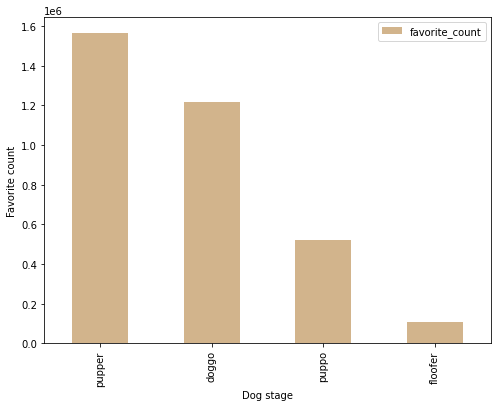

In [104]:
#Visualizing this on a bar chart 
fav.plot(kind='bar',ylabel='Favorite count',xlabel='Dog stage', figsize=(8,6), color ='tan');

#### Question 2: Which Dog stage is rated the highest?

In [105]:
rate = pd.DataFrame(Data.groupby('dogtype').mean()['rating_numerator'].sort_values(ascending=False).round(2))

In [106]:
rate

,rating_numerator
dogtype,
puppo,12.04
doggo,11.89
floofer,11.88
pupper,10.65


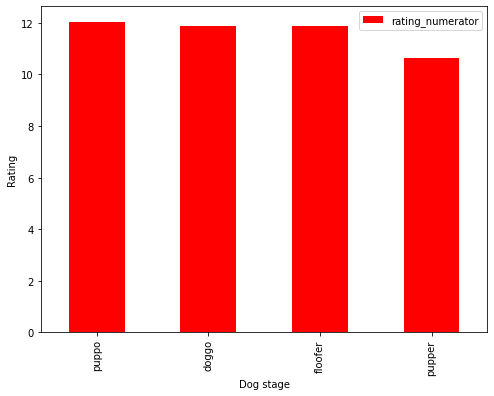

In [107]:
rate.plot(kind='bar',ylabel='Rating',xlabel='Dog stage', figsize=(8,6), color ='red');

Albeit not by a landslide, the puppo dog type edges the other dog types in terms of rating.

#### Question 3: Let's further validate that the most liked dog stage being pupper is affected by the count of tweets for the pupper dog stage

In [108]:
count = pd.DataFrame(Data['dogtype'].value_counts(normalize=True).sort_values(ascending=False).round(2)*100)

In [109]:
count

,dogtype
pupper,69.0
doggo,21.0
puppo,8.0
floofer,3.0


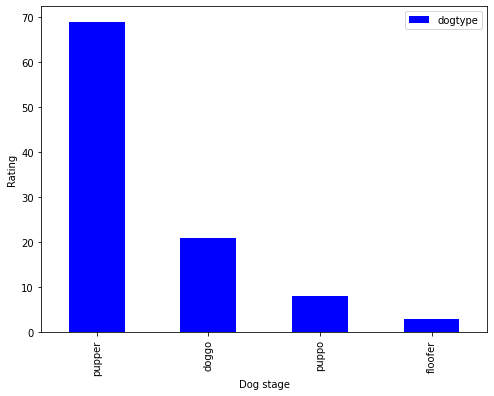

In [110]:
count.plot(kind='bar',ylabel='Rating',xlabel='Dog stage', figsize=(8,6), color ='blue');

This clearly shows that the dog stage that is clearly loved by the twitter community is the puppper stage, the stage ranked highest in average count of favorite,and also the amount of tweets.

#### What day of the week had the most tweet engagement?

In [111]:
day_count = pd.DataFrame(Data.groupby('day').sum()['favorite_count'].sort_values(ascending=False).round(2))

In [112]:
day_count

,favorite_count
day,
Saturday,684550
Wednesday,626139
Monday,544955
Thursday,426057
Tuesday,415965
Sunday,401311
Friday,319355


In [113]:
day_count_rt = pd.DataFrame(Data.groupby('day').sum()['retweet_count'].sort_values(ascending=False).round(2))

In [114]:
day_count_rt

,retweet_count
day,
Saturday,290745
Wednesday,211878
Monday,169316
Thursday,144112
Tuesday,121225
Sunday,118571
Friday,107582


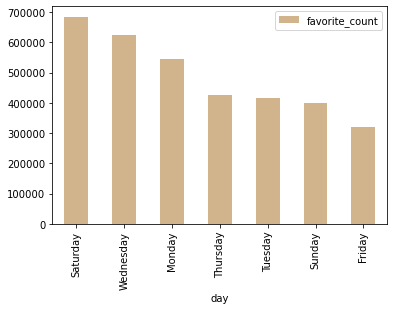

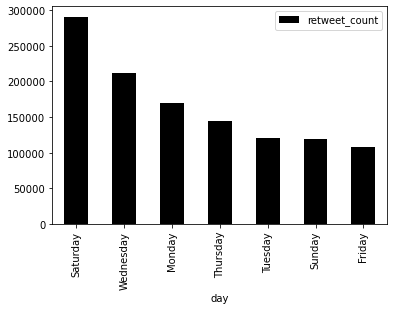

In [115]:
day_count.plot(kind = 'bar', label = 'favorite',color ='tan');
day_count_rt.plot(kind = 'bar',label = 'retweet',color='black');
plt.show()

## Conclusion

- The most liked dog stage is the pupper stage
- Tweets should be made on saturdays as the day records more engagements in terms of retweets and favorites